<a href="https://colab.research.google.com/github/singh-priyanshi/Drowsiness-Detection-by-Adversarial-Attacks-and-Adversarial_Retraining/blob/main/FAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install art
!pip install matplotlib
!pip install tensorflow
!pip install opencv-python
!pip install scikit-learn
!pip install foolbox

In [ ]:
!pip install tabulate

In [ ]:
#Importing required libraries.

import numpy as np
import pandas as pd
import os
import cv2
import opendatasets as od
import matplotlib.pyplot as plt

In [ ]:
od.download(
	"https://www.kaggle.com/datasets/dheerajperumandla/drowsiness-dataset", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: priyanshi13
Your Kaggle Key: ··········


100%|██████████| 161M/161M [00:04<00:00, 36.3MB/s]


In [ ]:
od.download('https://www.kaggle.com/datasets/adinishad/prediction-images', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: priyanshi13
Your Kaggle Key: ··········


100%|██████████| 1.18M/1.18M [00:00<00:00, 2.27MB/s]

In [ ]:
labels = os.listdir("./drowsiness-dataset/train")

In [ ]:
labels

['no_yawn', 'Closed', 'Open', 'yawn']

In [ ]:
#getting shape of random image
a = plt.imread("./drowsiness-dataset/train/yawn/150.jpg")
a.shape

(480, 640, 3)

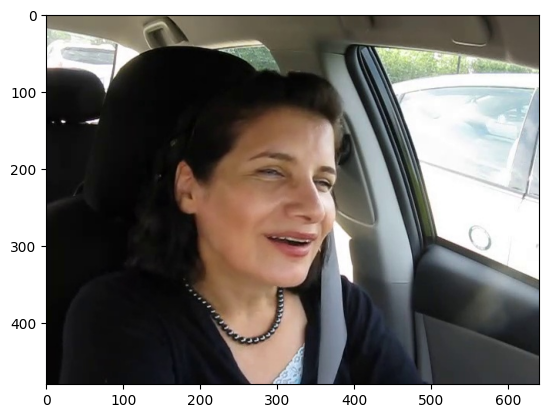

In [ ]:
plt.imshow(a)

Here, we are processing a driver drowsiness detection image dataset. It detects faces in the "yawn" and "no_yawn" image categories using OpenCV and resizes the detected regions of interest to 224x224 pixels. The resized image arrays, along with their class labels (0 or 1), are stored in a list called `yaw_no`. The function returns this list for all images in the specified directory.

In [ ]:
def face_for_yawn(direc="./drowsiness-dataset/train", face_cas_path="./prediction-images/haarcascade_frontalface_default.xml"):
    yaw_no = []  # create an empty list to store image arrays and their respective class numbers
    IMG_SIZE = 224  # define the size of the image to be resized to
    categories = ["yawn", "no_yawn"]  # define the categories of the images
    for category in categories:
        path_link = os.path.join(direc, category)  # create a path to the directory of each category
        class_num1 = categories.index(category)  # assign a unique class number to each category
        print(class_num1)  # print the class number for debugging purposes
        for image in os.listdir(path_link):  # loop through all the images in the directory
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)  # read the image and store it as an array
            face_cascade = cv2.CascadeClassifier(face_cas_path)  # load the face cascade classifier
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)  # detect all faces in the image
            for (x, y, w, h) in faces:  # loop through all the detected faces
                try:
                    img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)  # draw a rectangle around the face
                    roi_color = img[y:y+h, x:x+w]  # crop the image to only include the face
                    resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))  # resize the cropped image to the desired size
                    yaw_no.append([resized_array, class_num1])  # add the resized image and its class number to the list
                except Exception as e:
                    print(e)
    return yaw_no  # return the list of resized images and their class numbers


yawn_no_yawn = face_for_yawn()  # call the face_for_yawn function and store the result in yawn_no_yawn variable


0
1


In [ ]:
data_yawn = face_for_yawn()

0
1


We've defined a function that reads in driver drowsiness detection images from a specified directory. The function iterates over the "Closed" and "Open" categories of images, resizes each image array to 224x224 pixels, and appends it with its corresponding class label (2 or 3 for "Closed" or "Open", respectively) to a list called `data`. The function returns the `data` list containing all the resized images with their corresponding class labels for all the images in the specified directory.

In [ ]:
# This function is getting data from a directory
# It is using a Haar cascade for face detection and eye detection
# It is resizing the images to a specified size and appending the resized image and its label to a list
# The function returns the list of data
def get_data(dir_path="./drowsiness-dataset/train/", face_cas="./prediction-images/haarcascade_frontalface_default.xml", eye_cas="./prediction-images/haarcascade.xml"):
    # Define the labels for the data
    labels = ['Closed', 'Open']
    # Define the size of the images after resizing
    IMG_SIZE = 224
    # Create an empty list to store the data
    data = []
    # Loop through each label in the labels list
    for label in labels:
        # Define the path to the label's directory
        path = os.path.join(dir_path, label)
        # Get the index of the label in the labels list
        class_num = labels.index(label)
        # Add 2 to the class number to account for the additional classes for face and eyes
        class_num += 2
        # Loop through each image in the label's directory
        for img in os.listdir(path):
            try:
                # Read in the image and resize it
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                # Append the resized image and its label to the data list
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    # Return the list of data
    return data


In [ ]:
data_eyes = get_data()

## Appending yawn and non-yawn face images to the existing dataset

In [ ]:
def append_data():
    # call the `face_for_yawn()` function to get yawning and non-yawning face images
    yaw_no = face_for_yawn()

    # call the `get_data()` function to get open and closed eye images
    data = get_data()

    # combine the two datasets into a single list using the `extend()` method
    yaw_no.extend(data)

    # convert the resulting list to a NumPy array and return it
    # changing this for now as this give me an error
    # return np.array(yaw_no)

    return yaw_no


In [ ]:
new_data = append_data()

0
1


## Creating feature and label lists from the dataset

In [ ]:
# Initialize empty lists to store features and labels
X = []
y = []

# Iterate over each tuple of feature and label in the new_data list
for feature, label in new_data:

    # Append the feature to the X list
    X.append(feature)

    # Append the label to the y list
    y.append(label)


###  the feature array to be compatible with the input shape of the deep learning model.






In [ ]:
X = np.array(X)
X = X.reshape(-1, 224, 224, 3)

### One-hot encoding the labels using scikit-learn's LabelBinarizer






In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [ ]:
print(X.shape)
print(y.shape)

(1925, 224, 224, 3)
(1925, 4)


## Converting y(Labels) to a numpy array.






In [ ]:
y = np.array(y)

## Splitting data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
import numpy as np

if not os.path.exists('processed_data/'):
    os.makedirs('processed_data/')

# Save X_train, X_test, y_train, y_test
np.save('processed_data/X_train.npy', X_train)
np.save('processed_data/X_test.npy', X_test)
np.save('processed_data/y_train.npy', y_train)
np.save('processed_data/y_test.npy', y_test)


In [ ]:
# Load the data back
X_train = np.load('processed_data/X_train.npy')
X_test = np.load('processed_data/X_test.npy')
y_train = np.load('processed_data/y_train.npy')
y_test = np.load('processed_data/y_test.npy')

# Imports

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Data Augmentation

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'input_combined' is the input data for the combined model
input_combined = keras.Input(shape=(224, 224, 3))  # Adjust based on your data shape

# Base pre-trained model (e.g., MobileNetV2)
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_combined)

# Add custom layers for classification
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(4, activation='softmax')(x)  # 4 classes: eyes open/close, yawn/no yawn

# Create the model
model = keras.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Training the model

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 59s 497ms/step - loss: 0.3078 - accuracy: 0.8924 - val_loss: 7.9727 - val_accuracy: 0.7042
Epoch 2/50
43/43 [==============================] - 19s 435ms/step - loss: 0.1199 - accuracy: 0.9614 - val_loss: 9.3196 - val_accuracy: 0.7232
Epoch 3/50
43/43 [==============================] - 19s 438ms/step - loss: 0.0786 - accuracy: 0.9710 - val_loss: 8.0739 - val_accuracy: 0.7301
Epoch 4/50
43/43 [==============================] - 20s 455ms/step - loss: 0.0806 - accuracy: 0.9718 - val_loss: 5.7092 - val_accuracy: 0.7180
Epoch 5/50
43/43 [==============================] - 19s 435ms/step - loss: 0.1012 - accuracy: 0.9733 - val_loss: 11.7936 - val_accuracy: 0.5069
Epoch 6/50
43/43 [==============================] - 20s 454ms/step - loss: 0.0954 - accuracy: 0.9651 - val_loss: 5.7814 - val_accuracy: 0.7561
Epoch 7/50
43/43 [==============================] - 20s 462ms/step - loss: 0.1306 - accuracy: 0.9629 - val_loss: 19.7785 - val_accuracy: 0.39

In [ ]:
model.save("driver_drowsiness_mobilenet_imagenet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluations

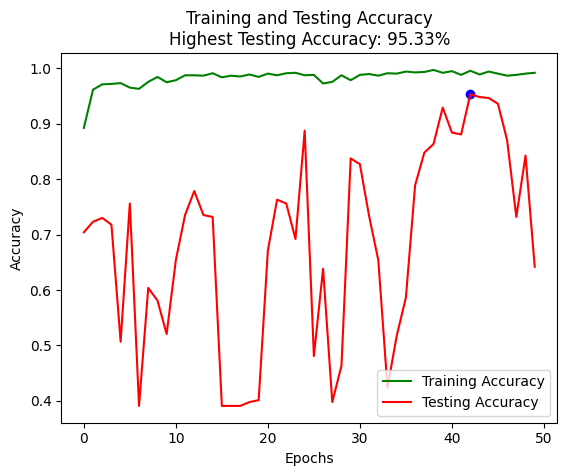

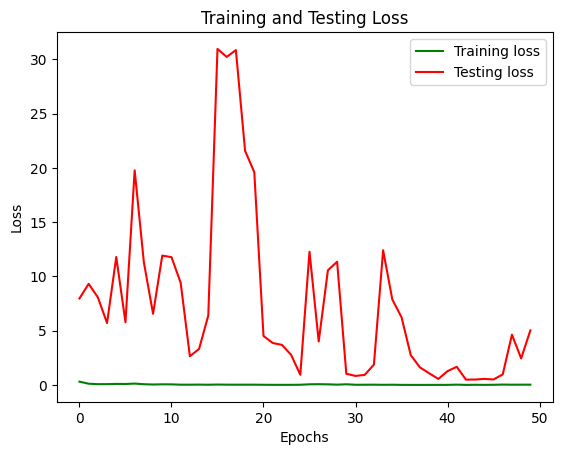

In [ ]:
# Extracting the accuracy and loss values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Finding the index and value of the highest testing accuracy
max_val_acc = max(val_accuracy)
max_val_acc_index = val_accuracy.index(max_val_acc)
#max and min loss and accuracy values - test and train
min_val_acc = min(val_accuracy)
max_accuracy = max(accuracy)
min_loss =  min(loss)
min_val_loss = min(val_loss)

# Plotting the highest testing accuracy as a point on the accuracy plot
plt.plot(max_val_acc_index, max_val_acc, marker='o', color='blue')

# Plotting the training and testing accuracy over epochs
plt.plot(epochs, accuracy, "g", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "r", label="Testing Accuracy")
plt.legend()
plt.title("Training and Testing Accuracy\nHighest Testing Accuracy: {:.2f}%".format(max_val_acc*100))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Plotting the training and testing loss over epochs
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Testing loss")
plt.legend()
plt.title("Training and Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [ ]:
from tabulate import tabulate

# create a list of lists containing the metric names and their values
table = [["Maximum Testing accuracy:", f"\033[1;32m{max_val_acc:.4f}\033[0m"],
         ["Maximum Training accuracy:", f"\033[1;32m{max_accuracy:.4f}\033[0m"],
         ["Minimum Training Loss:", f"\033[1;31m{min_loss:.4f}\033[0m"],
         ["Minimum Testing Loss:", f"\033[1;31m{min_val_loss:.4f}\033[0m"]]

# print the table using tabulate, with "Metric" and "Value" as headers and "fancy_grid" as the table format
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


╒════════════════════════════╤═════════╕
│ Metric                     │   Value │
╞════════════════════════════╪═════════╡
│ Maximum Testing accuracy:  │  0.9533 │
├────────────────────────────┼─────────┤
│ Maximum Training accuracy: │  0.997  │
├────────────────────────────┼─────────┤
│ Minimum Training Loss:     │  0.0083 │
├────────────────────────────┼─────────┤
│ Minimum Testing Loss:      │  0.4946 │
╘════════════════════════════╧═════════╛


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 1s 58ms/step - loss: 5.0307 - accuracy: 0.6419
Test loss: 5.030653476715088
Test accuracy: 0.641868531703949


# Load baseline model back

In [ ]:
model = tf.keras.models.load_model("driver_drowsiness_mobilenet_imagenet.h5")
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 2s 52ms/step - loss: 5.0307 - accuracy: 0.6419
Test loss: 5.030653476715088
Test accuracy: 0.641868531703949


# Fast Adaptive Boundary (FAB) attack

A Fast Adaptive Boundary (FAB) attack involves generating adversarial examples to evaluate the robustness of a machine learning model. To perform the FAB attack, you can use libraries like Foolbox, which provides tools for creating adversarial examples and evaluating their effectiveness.

In [ ]:
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0

In [ ]:
!pip install torchattacks

In [ ]:
import torch
import torchvision

print(f"PyTorch Version: {torch.__version__}")
print(f"torchvision Version: {torchvision.__version__}")


PyTorch Version: 2.1.0+cu121
torchvision Version: 0.16.0+cu121


In [ ]:
import torch
from torchvision import transforms
from torchattacks import FAB

In [ ]:
torch.save(model, "driver_drowsiness_mobilenet_imagenet_resaved.h5")

In [ ]:
# Load the newly saved model
new_model = torch.load("driver_drowsiness_mobilenet_imagenet_resaved.h5")

In [56]:
# Define the FAB attack parameters
fab_attack = FAB(new_model, norm='Linf', eps=0.03137254901960784, steps=10, n_restarts=1, alpha_max=0.1, eta=1.05, beta=0.9, verbose=False, seed=0, n_classes=4)

In [57]:
# Define a function to perform the FAB attack on a batch of images
def perform_fab_attack(images, labels):
    images = torch.tensor(images.transpose((0, 3, 1, 2)), dtype=torch.float32)  # Adjust image format
    labels = torch.tensor(labels, dtype=torch.long)
    adv_images = fab_attack(images, labels)
    return adv_images

In [60]:
# Choose a batch of test images and labels
num_samples = 4
batch_indices = np.random.choice(len(X_test), num_samples, replace=False)
test_batch_images = X_test[batch_indices]
test_batch_labels = y_test[batch_indices]

In [61]:
# Perform the FAB attack on the test batch
adv_images = perform_fab_attack(test_batch_images, test_batch_labels)

In [62]:
# Evaluate the model on the adversarial examples
with torch.no_grad():
    adv_images = adv_images.numpy().transpose((0, 2, 3, 1))  # Adjust image format
    adv_labels = np.argmax(model.predict(adv_images), axis=1)
    original_labels = np.argmax(test_batch_labels, axis=1)

    # Calculate accuracy on adversarial examples
    accuracy = np.sum(adv_labels == original_labels) / num_samples
    print(f"Accuracy on adversarial examples: {accuracy * 100:.2f}%")

1/1 [==============================] - 1s 1s/step
Accuracy on adversarial examples: 50.00%


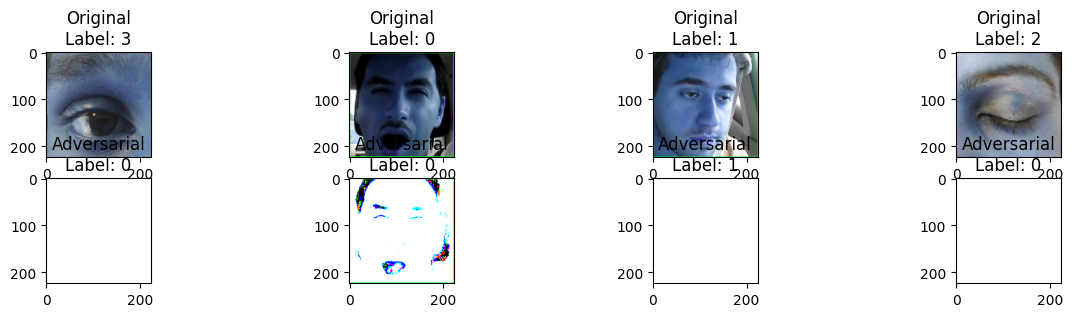

In [63]:
# Display the original and adversarial images for visual inspection
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(test_batch_images[i])
    plt.title(f"Original\nLabel: {original_labels[i]}")

    plt.subplot(2, num_samples, num_samples + i + 1)
    plt.imshow(adv_images[i])
    plt.title(f"Adversarial\nLabel: {adv_labels[i]}")

plt.show()